# Trabalho de Aplicação do Conhecimento (TAC)
# Aluna: MFSSM
## <font color='orangered'>Comparação entre os Modelos Estatísticos e os de Redes Neurais Profundas</font>

## Pacotes

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as m
from matplotlib.pyplot import figure
from matplotlib import cycler
import matplotlib.dates as mdates
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

C:\Users\mfran\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mfran\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\mfran\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\mfran\AppData\Local\Temp\ipykernel_7700\1679672481.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
#Cores: "Accent", "Blues", "BuGn", "BuPu", "GnBu", "Greens", "OrRd", "Oranges", "Paired",
# "Pastel1", "Pastel2", "PiYG", "PuBu", "PuBuGn".

# AMAZON

In [3]:
# Leitura
df1 = pd.read_csv('amzn_sarimax.csv', sep=",")
df1 = df1[["date", "AMZN_Preço_Ação", "AMZN_SARIMAX"]]

df2 = pd.read_csv('amzn_tft1.csv', sep=",")
df2 = df2[["date", "AMZN_TFT1"]]

df3 = pd.read_csv('amzn_tft2.csv', sep=",")
df3 = df3[["date", "AMZN_TFT2"]]

df4 = pd.read_csv('amzn_tft3.csv', sep=",")
df4a = df4[["date", "AMZN_TFT3"]]

df5 = pd.read_csv('amzn_tft4.csv', sep=",")
df5a = df5[["date", "AMZN_TFT4"]]

# Merge
amazon1 = pd.merge(df1, df2, on="date")
amazon2 = pd.merge(amazon1, df3, on="date")
amazon3 = pd.merge(amazon2, df4a, on="date")
amazon4 = pd.merge(amazon3, df5a, on="date")

# Filtro por data
amazon_d = (amazon4["date"] >= '2024-08-20')
amazon_d1 = amazon4[amazon_d]

# Indexar a data
amazon_d2 = amazon_d1.set_index('date')

In [4]:
amazon_d2.tail(10)

,AMZN_Preço_Ação,AMZN_SARIMAX,AMZN_TFT1,AMZN_TFT2,AMZN_TFT3,AMZN_TFT4
date,,,,,,
2024-08-30,178.500000,172.750617,171.925125,170.575073,175.071411,174.218094
2024-09-03,176.250000,173.824777,171.655365,169.323578,175.067764,174.186829
2024-09-04,173.330002,173.812641,171.543793,169.469833,174.961014,173.619217
2024-09-05,177.889999,173.532653,171.470428,170.044510,175.034286,172.761795
2024-09-06,171.389999,175.277684,171.518509,170.382507,175.054504,173.614548
2024-09-09,175.399994,174.626672,171.924973,170.946304,174.991440,173.670578
2024-09-10,179.550003,174.686269,172.053741,170.978546,175.041794,173.533737
2024-09-11,184.520004,175.473820,171.992691,170.695068,174.993668,174.011642
2024-09-12,187.000000,177.353266,172.027649,170.831482,174.904907,173.485458


In [5]:
amzn_sar1 = amazon_d2.reset_index()
amzn_sar2 = amzn_sar1[["AMZN_Preço_Ação", "AMZN_SARIMAX"]]
amzn_tft2 = amzn_sar1[["AMZN_Preço_Ação", "AMZN_TFT1", "AMZN_TFT2", "AMZN_TFT3", "AMZN_TFT4"]]

# GOOGLE

In [6]:
# Leitura
df1g = pd.read_csv('goog_sarimax.csv', sep=",")
df1g = df1g[["date", "GOOG_Preço_Ação", "GOOG_SARIMAX"]]

df2g = pd.read_csv('goog_tft1.csv', sep=",")
df2g = df2g[["date", "GOOG_TFT1"]]

df3g = pd.read_csv('goog_tft2.csv', sep=",")
df3g = df3g[["date", "GOOG_TFT2"]]

df4g = pd.read_csv('goog_tft3.csv', sep=",")
df4g = df4g[["date", "GOOG_TFT3"]]

df5g = pd.read_csv('goog_tft4.csv', sep=",")
df5g = df5g[["date", "GOOG_TFT4"]]

# Merge
emp1 = pd.merge(df1g, df2g, on="date")
emp2 = pd.merge(emp1, df3g, on="date")
emp3 = pd.merge(emp2, df4g, on="date")
emp4 = pd.merge(emp3, df5g, on="date")

# Filtro por data
emp_d = (emp4["date"] >= '2024-08-20')
emp_d1 = emp4[emp_d]

# Indexar a data
emp_d2 = emp_d1.set_index('date')

In [7]:
emp_d2.tail(10)

,GOOG_Preço_Ação,GOOG_SARIMAX,GOOG_TFT1,GOOG_TFT2,GOOG_TFT3,GOOG_TFT4
date,,,,,,
2024-08-30,165.110001,164.990176,145.939438,141.935791,158.809967,160.722687
2024-09-03,158.610001,164.636166,145.912933,141.866501,158.704666,160.723953
2024-09-04,157.809998,162.422479,145.873169,141.876724,158.731003,160.723816
2024-09-05,158.600006,160.998837,145.789078,141.736526,158.794189,160.723862
2024-09-06,152.130005,160.140863,145.696030,141.567368,158.708282,160.723465
2024-09-09,149.539993,157.798609,145.619522,141.470016,158.703400,160.725266
2024-09-10,150.009995,154.772026,145.492493,141.129486,158.728973,160.724319
2024-09-11,152.149994,152.786445,145.271057,140.539825,158.754791,160.703705
2024-09-12,155.539993,151.724728,145.074036,140.171906,158.752823,160.712936


In [8]:
gtft1 = emp_d2.reset_index()
gtft1s = gtft1[["GOOG_Preço_Ação", "GOOG_SARIMAX"]]
gtft2 = gtft1[["GOOG_Preço_Ação", "GOOG_TFT1", "GOOG_TFT2", "GOOG_TFT3", "GOOG_TFT4"]]

# MICROSOFT

In [9]:
# Leitura
df1m = pd.read_csv('msft_sarimax.csv', sep=",")
df1m = df1m[["date", "MSFT_Preço_Ação", "MSFT_SARIMAX"]]

df2m = pd.read_csv('msft_tft1.csv', sep=",")
df2m = df2m[["date", "MSFT_TFT1"]]

df3m = pd.read_csv('msft_tft2.csv', sep=",")
df3m = df3m[["date", "MSFT_TFT2"]]

df4m = pd.read_csv('msft_tft3.csv', sep=",")
df4m = df4m[["date", "MSFT_TFT3"]]

df5m = pd.read_csv('msft_tft4.csv', sep=",")
df5m = df5m[["date", "MSFT_TFT4"]]

# Merge
emp1m = pd.merge(df1m, df2m, on="date")
emp2m = pd.merge(emp1m, df3m, on="date")
emp3m = pd.merge(emp2m, df4m, on="date")
emp4m = pd.merge(emp3m, df5m, on="date")

# Filtro por data
emp_dm = (emp4m["date"] >= '2024-08-20')
emp_d1m = emp4m[emp_dm]

# Indexar a data
emp_d2m = emp_d1m.set_index('date')

In [10]:
emp_d2m.tail(10)

,MSFT_Preço_Ação,MSFT_SARIMAX,MSFT_TFT1,MSFT_TFT2,MSFT_TFT3,MSFT_TFT4
date,,,,,,
2024-08-30,417.140015,413.976025,349.073059,335.768738,415.799011,413.219330
2024-09-03,409.440002,414.411596,348.955505,335.767670,415.808197,413.218872
2024-09-04,408.899994,413.353474,349.344604,335.752411,415.847229,413.221985
2024-09-05,408.390015,412.545924,349.391022,335.750763,415.801514,413.223358
2024-09-06,401.700012,412.250744,349.162933,335.736481,415.800842,413.219269
2024-09-09,405.720001,409.703938,348.921692,335.773285,415.799316,413.218536
2024-09-10,414.200012,407.836642,347.929352,335.750397,415.795441,413.217865
2024-09-11,423.040009,408.598997,347.483551,335.620270,415.798706,413.216980
2024-09-12,427.000000,411.297395,348.348877,335.639465,415.813477,413.220581


In [11]:
mtft1 = emp_d2m.reset_index()
mtft3 = mtft1[["MSFT_Preço_Ação", "MSFT_SARIMAX"]]
mtft2 = mtft1[["MSFT_Preço_Ação", "MSFT_TFT1", "MSFT_TFT2", "MSFT_TFT3", "MSFT_TFT4"]]

# NVIDIA

In [12]:
# Leitura
df1n = pd.read_csv('nvda_sarimax.csv', sep=",")
df1n = df1n[["date", "NVDA_Preço_Ação", "NVDA_SARIMAX"]]

df2n = pd.read_csv('nvda_tft1.csv', sep=",")
df2n = df2n[["date", "NVDA_TFT1"]]

df3n = pd.read_csv('nvda_tft2.csv', sep=",")
df3n = df3n[["date", "NVDA_TFT2"]]

df4n = pd.read_csv('nvda_tft3.csv', sep=",")
df4n = df4n[["date", "NVDA_TFT3"]]

df5n = pd.read_csv('nvda_tft4.csv', sep=",")
df5n = df5n[["date", "NVDA_TFT4"]]

# Merge
emp1n = pd.merge(df1n, df2n, on="date")
emp2n = pd.merge(emp1n, df3n, on="date")
emp3n = pd.merge(emp2n, df4n, on="date")
emp4n = pd.merge(emp3n, df5n, on="date")

# Filtro por data
emp_dn = (emp4n["date"] >= '2024-08-20')
emp_d1n = emp4n[emp_dn]

# Indexar a data
emp_d2n = emp_d1n.set_index('date')

In [13]:
emp_d2n.tail(10)

,NVDA_Preço_Ação,NVDA_SARIMAX,NVDA_TFT1,NVDA_TFT2,NVDA_TFT3,NVDA_TFT4
date,,,,,,
2024-08-30,119.370003,123.984302,45.820763,48.717548,112.591248,108.451042
2024-09-03,108.000000,122.524070,45.795940,48.724899,111.749153,108.227867
2024-09-04,106.209999,118.692773,45.791084,48.715794,109.939270,107.671936
2024-09-05,107.209999,115.499735,45.757717,48.715828,109.402466,107.481056
2024-09-06,102.830002,112.019370,45.730888,48.716187,105.024513,105.836693
2024-09-09,106.470001,108.476227,45.711533,48.730976,103.872490,104.893692
2024-09-10,108.099998,106.233069,45.683662,48.735031,102.900902,104.329659
2024-09-11,116.910004,105.374959,45.686470,48.748775,102.052780,103.441612
2024-09-12,119.139999,107.160297,45.702274,48.765953,105.671051,104.734932


In [14]:
ntft1 = emp_d2n.reset_index()
ntft3 = ntft1[["NVDA_Preço_Ação", "NVDA_SARIMAX"]]
ntft2 = ntft1[["NVDA_Preço_Ação", "NVDA_TFT1", "NVDA_TFT2", "NVDA_TFT3", "NVDA_TFT4"]]

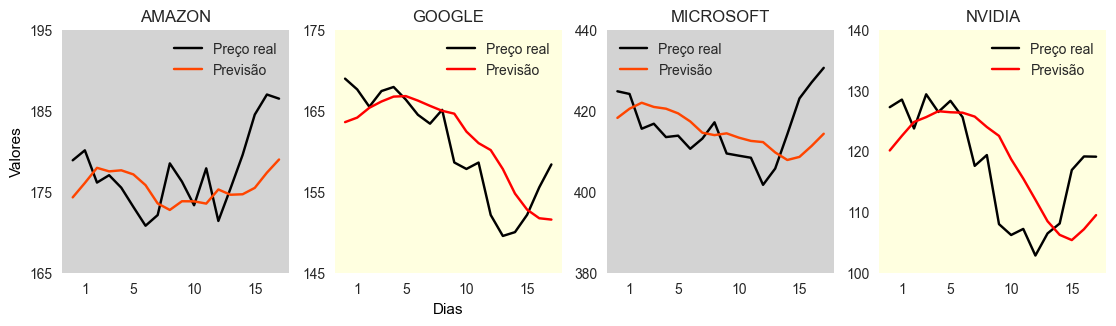

In [15]:
# Cria os subplots
fig, axes = plt.subplots(1, 4, figsize = (12,3))
      
# Cria o plot1
axes[0].plot(amzn_sar2["AMZN_Preço_Ação"], label="Preço real", color="black")
axes[0].plot(amzn_sar2["AMZN_SARIMAX"], label="Previsão", color="orangered")
ticks = axes[0].set_yticks([165, 175, 185, 195])
ticks = axes[0].set_xticks([1, 5, 10, 15])
axes[0].set_title('AMAZON')
axes[0].set_ylabel('Valores', color='black')
axes[0].legend(loc='best')
axes[0].set_facecolor('lightgrey')
axes[0].grid(False)

# Cria o plot2
axes[1].plot(gtft1s["GOOG_Preço_Ação"], label="Preço real", color="black")
axes[1].plot(gtft1s["GOOG_SARIMAX"], label="Previsão", color="red")
ticks = axes[1].set_yticks([145, 155, 165, 175])
ticks = axes[1].set_xticks([1, 5, 10, 15])
axes[1].set_title('GOOGLE')
axes[1].set_xlabel('Dias', color='black')
axes[1].legend(loc='best')
axes[1].set_facecolor('lightyellow')
axes[1].grid(False)

# Cria o plot3
axes[2].plot(mtft3["MSFT_Preço_Ação"], label="Preço real", color="black")
axes[2].plot(mtft3["MSFT_SARIMAX"], label="Previsão", color="orangered")
ticks = axes[2].set_yticks([380, 400, 420, 440])
ticks = axes[2].set_xticks([1, 5, 10, 15])
axes[2].set_title('MICROSOFT')
axes[2].legend(loc='best')
axes[2].set_facecolor('lightgray')
axes[2].grid(False)

# Cria o plot4
axes[3].plot(ntft3["NVDA_Preço_Ação"], label="Preço real", color="black")
axes[3].plot(ntft3["NVDA_SARIMAX"], label="Previsão", color="red")
ticks = axes[3].set_yticks([100, 110, 120, 130, 140])
ticks = axes[3].set_xticks([1, 5, 10, 15])
axes[3].set_title('NVIDIA')
axes[3].legend(loc='best')
axes[3].set_facecolor('lightyellow')
axes[3].grid(False);

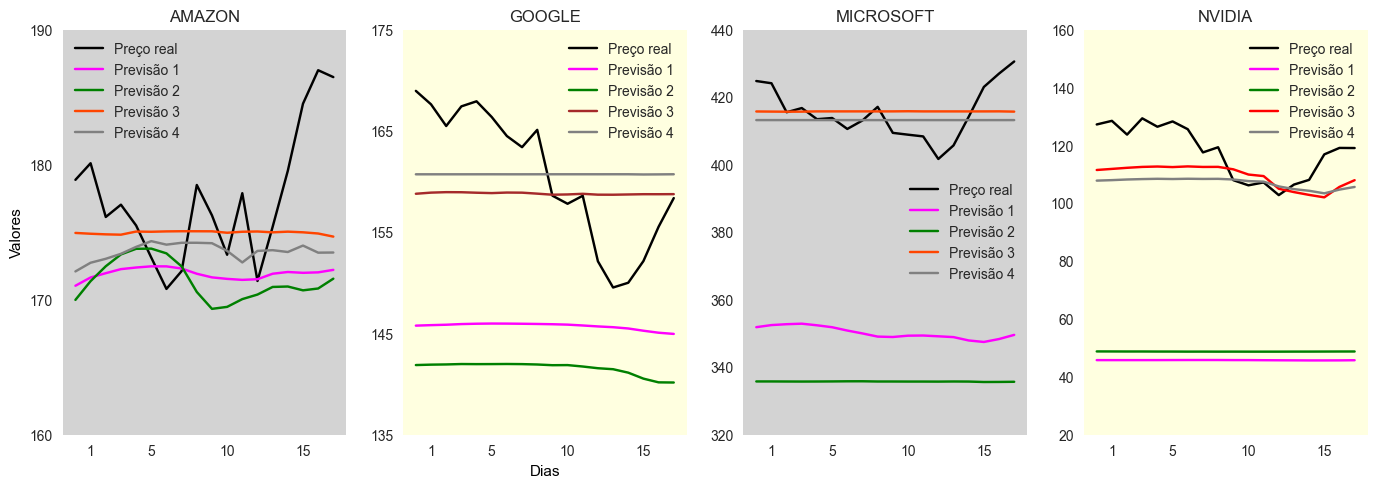

In [17]:
# Cria os subplots
fig, axes = plt.subplots(1, 4, figsize = (15,5))
      
# AMAZON - TRT
axes[0].plot(amzn_tft2["AMZN_Preço_Ação"], label="Preço real", color="black")
axes[0].plot(amzn_tft2["AMZN_TFT1"], label="Previsão 1", color="magenta")
axes[0].plot(amzn_tft2["AMZN_TFT2"], label="Previsão 2", color="green")
axes[0].plot(amzn_tft2["AMZN_TFT3"], label="Previsão 3", color="orangered")
axes[0].plot(amzn_tft2["AMZN_TFT4"], label="Previsão 4", color="grey")
ticks = axes[0].set_yticks([160, 170, 180, 190])
ticks = axes[0].set_xticks([1, 5, 10, 15])
axes[0].set_title('AMAZON')
axes[0].set_ylabel('Valores', color='black')
axes[0].legend(loc='best')
axes[0].set_facecolor('lightgrey')
axes[0].grid(False)

# GOOGLE - TRT
axes[1].plot(gtft2["GOOG_Preço_Ação"], label="Preço real", color="black")
axes[1].plot(gtft2["GOOG_TFT1"], label="Previsão 1", color="magenta")
axes[1].plot(gtft2["GOOG_TFT2"], label="Previsão 2", color="green")
axes[1].plot(gtft2["GOOG_TFT3"], label="Previsão 3", color="brown")
axes[1].plot(gtft2["GOOG_TFT4"], label="Previsão 4", color="grey")
ticks = axes[1].set_yticks([135, 145, 155, 165, 175])
ticks = axes[1].set_xticks([1, 5, 10, 15])
axes[1].set_title('GOOGLE')
axes[1].set_xlabel('Dias', color='black')
axes[1].legend(loc='best')
axes[1].set_facecolor('lightyellow')
axes[1].grid(False)

# MICROSOFT
axes[2].plot(mtft2["MSFT_Preço_Ação"], label="Preço real", color="black")
axes[2].plot(mtft2["MSFT_TFT1"], label="Previsão 1", color="magenta")
axes[2].plot(mtft2["MSFT_TFT2"], label="Previsão 2", color="green")
axes[2].plot(mtft2["MSFT_TFT3"], label="Previsão 3", color="orangered")
axes[2].plot(mtft2["MSFT_TFT4"], label="Previsão 4", color="grey")
ticks = axes[2].set_yticks([320, 340, 360, 380, 400, 420, 440])
ticks = axes[2].set_xticks([1, 5, 10, 15])
axes[2].set_title('MICROSOFT')
axes[2].legend(loc='best')
axes[2].set_facecolor('lightgrey')
axes[2].grid(False)

# NVIDIA
axes[3].plot(ntft2["NVDA_Preço_Ação"], label="Preço real", color="black")
axes[3].plot(ntft2["NVDA_TFT1"], label="Previsão 1", color="magenta")
axes[3].plot(ntft2["NVDA_TFT2"], label="Previsão 2", color="green")
axes[3].plot(ntft2["NVDA_TFT3"], label="Previsão 3", color="red")
axes[3].plot(ntft2["NVDA_TFT4"], label="Previsão 4", color="grey")
ticks = axes[3].set_yticks([20, 40, 60, 80, 100, 120, 140, 160])
ticks = axes[3].set_xticks([1, 5, 10, 15])
axes[3].set_title('NVIDIA')
axes[3].legend(loc='best')
axes[3].set_facecolor('lightyellow')
axes[3].grid(False);